# Md.Syfulla
Id:21225103186

In [24]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Undirected graph (city roads)
G_city = nx.Graph()
undirected_edges = [('A', 'B'), ('A', 'C'), ('B', 'D'), ('D', 'E'),('E', 'F'), ('F', 'G'), ('G', 'H')]
G_city.add_edges_from(undirected_edges)

# Directed graph (drone roads)
G_drone = nx.DiGraph()
directed_edges = [('C', 'D'), ('D', 'F'), ('F', 'H'), ('H', 'C')]
G_drone.add_edges_from(directed_edges)

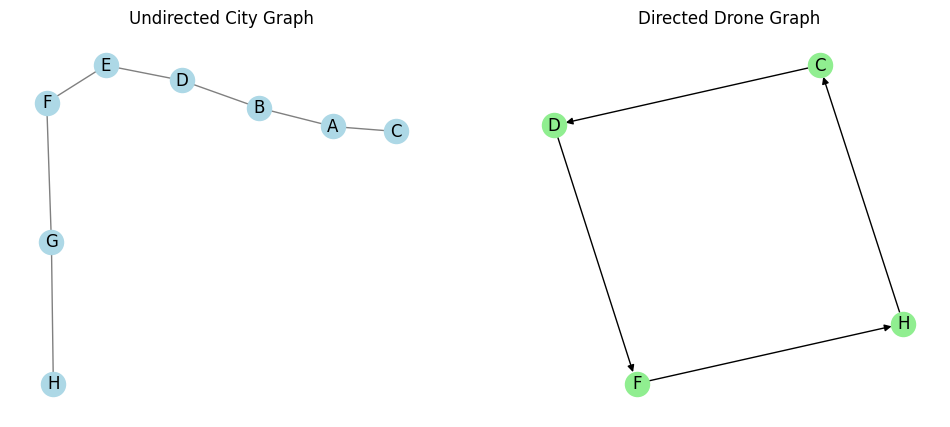

In [26]:
#Q1:Visualize both graphs using networkx.draw().
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
nx.draw(G_city, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Undirected City Graph")

plt.subplot(1, 2, 2)
nx.draw(G_drone, with_labels=True, node_color='lightgreen', edge_color='black', arrows=True)
plt.title("Directed Drone Graph")

plt.show()

In [25]:
#Q2:Find the shortest path between Airport (A) and Hospital (H) in the undirected graph
# Find shortest path from A to H
shortest_path_A_H = nx.shortest_path(G_city, source='A', target='H')
path_length = nx.shortest_path_length(G_city, source='A', target='H')

print("Shortest path from A to H:", shortest_path_A_H)
print("Path length:", path_length)

Shortest path from A to H: ['A', 'B', 'D', 'E', 'F', 'G', 'H']
Path length: 6


In [27]:
#Q3:Check if the city (G_city) is connected.
is_connected = nx.is_connected(G_city)
print("Is city graph connected?", is_connected)


if is_connected:
    connected_path = list(nx.node_connected_component(G_city, "A"))
    print("Connected component including 'A':", connected_path)
else:
    components = list(nx.connected_components(G_city))
    print("Disconnected components:", components)


Is city graph connected? True
Connected component including 'A': ['A', 'C', 'H', 'E', 'D', 'B', 'G', 'F']


In [28]:
#Q4:Find all locations reachable from Central Mall (C) by drone only.
reachable_from_C = list(nx.descendants(G_drone, 'C'))
reachable_count = len(reachable_from_C)

print("Locations reachable from C (drone only):", reachable_from_C)
print("Number of reachable Edges:", reachable_count)


Locations reachable from C (drone only): ['H', 'F', 'D']
Number of reachable Edges: 3


In [29]:
#Q5:Detects a cycle in the drone delivery route graph.
cycles = list(nx.simple_cycles(G_drone))
has_cycle = len(cycles) > 0

print("Drone graph has cycle?", has_cycle)
print("Cycles found:", cycles)

Drone graph has cycle? True
Cycles found: [['C', 'D', 'F', 'H']]


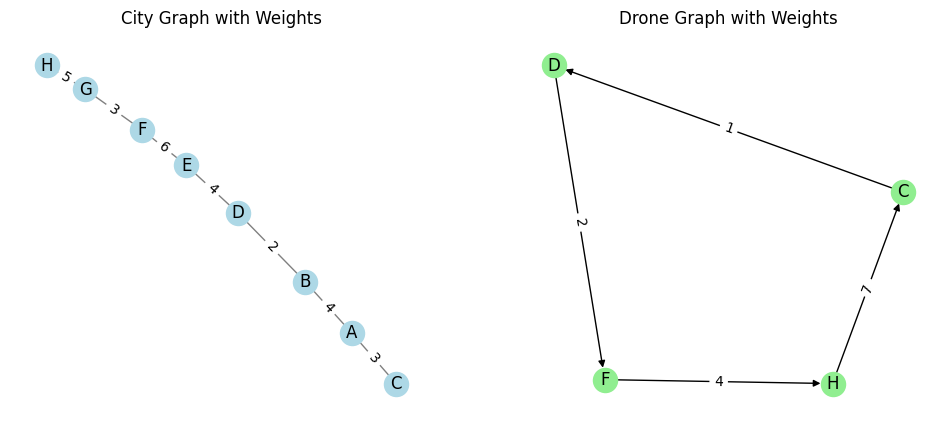

In [30]:
#Q6:Add weights (distances in km) to each edge
# Weights (distances in km)
weights = {
    ('A', 'B'): 4, ('A', 'C'): 3, ('B', 'D'): 2, ('D', 'E'): 4,('E', 'F'): 6, ('F', 'G'): 3, ('G', 'H'): 5,('C', 'D'): 1, ('D', 'F'): 2, ('F', 'H'): 4, ('H', 'C'): 7}

# Assign weights to graphs
nx.set_edge_attributes(G_city, {k: v for k, v in weights.items() if k in G_city.edges()}, 'weight')
nx.set_edge_attributes(G_drone, {k: v for k, v in weights.items() if k in G_drone.edges()}, 'weight')

plt.figure(figsize=(12, 5))

# Draw City Graph (Undirected)
plt.subplot(1, 2, 1)
pos1 = nx.spring_layout(G_city)
nx.draw(G_city, pos1, with_labels=True, node_color='lightblue', edge_color='gray')
edge_labels_city = nx.get_edge_attributes(G_city, 'weight')
nx.draw_networkx_edge_labels(G_city, pos1, edge_labels=edge_labels_city)
plt.title("City Graph with Weights")

# Draw Drone Graph (Directed)
plt.subplot(1, 2, 2)
pos2 = nx.spring_layout(G_drone)
nx.draw(G_drone, pos2, with_labels=True, node_color='lightgreen', edge_color='black', arrows=True)
edge_labels_drone = nx.get_edge_attributes(G_drone, 'weight')
nx.draw_networkx_edge_labels(G_drone, pos2, edge_labels=edge_labels_drone)
plt.title("Drone Graph with Weights")

plt.show()

In [31]:
#Q7:Find the minimum distance path from Airport to Garden.
min_dist_path_A_G = nx.shortest_path(G_city, source='A', target='G', weight='weight')
min_dist_A_G_length = nx.shortest_path_length(G_city, source='A', target='G', weight='weight')

print("Minimum distance path from A to G:", min_dist_path_A_G)
print("Total distance:", min_dist_A_G_length, "km")


Minimum distance path from A to G: ['A', 'B', 'D', 'E', 'F', 'G']
Total distance: 19 km


In [32]:
#Q8:Find which location has the highest degree in the city road graph.
highest_degree_node = max(G_city.degree, key=lambda x: x[1])
print("Node with highest degree:", highest_degree_node)


Node with highest degree: ('A', 2)


In [34]:
#Q9:Convert the undirected graph into an adjacency matrix.
adj_matrix = nx.to_numpy_array(G_city, nodelist=sorted(G_city.nodes()), dtype=int)

# Convert to pandas DataFrame
adj_df = pd.DataFrame(adj_matrix, columns=sorted(G_city.nodes()), index=sorted(G_city.nodes()))

# Print result
print("Adjacency Matrix as DataFrame (Integers):")
print(adj_df)



Adjacency Matrix as DataFrame (Integers):
   A  B  C  D  E  F  G  H
A  0  4  3  0  0  0  0  0
B  4  0  0  2  0  0  0  0
C  3  0  0  0  0  0  0  0
D  0  2  0  0  4  0  0  0
E  0  0  0  4  0  6  0  0
F  0  0  0  0  6  0  3  0
G  0  0  0  0  0  3  0  5
H  0  0  0  0  0  0  5  0


In [35]:
#Q9:
adj_matrix = nx.adjacency_matrix(G_city).todense()
print("Q9: Adjacency matrix of city graph:\n", adj_matrix)

Q9: Adjacency matrix of city graph:
 [[0 4 3 0 0 0 0 0]
 [4 0 0 2 0 0 0 0]
 [3 0 0 0 0 0 0 0]
 [0 2 0 0 4 0 0 0]
 [0 0 0 4 0 6 0 0]
 [0 0 0 0 6 0 3 0]
 [0 0 0 0 0 3 0 5]
 [0 0 0 0 0 0 5 0]]


In [36]:
#Q10:Find all nodes with even degree in the undirected graph.
even_degree_nodes = [node for node, deg in G_city.degree if deg % 2 == 0]
print("Nodes with even degree:", even_degree_nodes)


Nodes with even degree: ['A', 'B', 'D', 'E', 'F', 'G']


In [38]:
#Q11:Count the number of paths of length 2 from A to G.
import numpy as np

nodes = list(G_city.nodes())
adj_np = np.array(adj_matrix)

index_A = nodes.index('A')
index_G = nodes.index('G')

adj_squared = np.linalg.matrix_power(adj_np, 2)
num_paths_len_2 = adj_squared[index_A, index_G]
print(f"Number of paths of length 2 from A to G: {num_paths_len_2}")


Number of paths of length 2 from A to G: 0
